The larger the population has the greater number of drivers
The more urban areas have more rides
The more rural areas have a greater average fare. 

In [ ]:
#import dependancies
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [2]:
#read csv files
city_df = pd.read_csv('resources/city_data.csv')
ride_df = pd.read_csv('resources/ride_data.csv')

In [3]:
#get avg fare, fare sum and count of rides
fare_df = pd.DataFrame(ride_df.groupby(['city'], as_index=False)
                        .agg({'date':'count', "fare": [np.mean, np.sum]})
                        )
fare_df.columns = fare_df.columns.droplevel(1)

In [4]:
#Merge DFs to create pyber df for plot
pyber_df = (pd.merge(fare_df,city_df, how='outer',on = 'city'))
pyber_df.columns = ['City', 'Ride Cnt', 'Avg Fare', 'Fare Sum', 'Driver Cnt', 'cat']
condlist = [pyber_df['cat']=='Urban',pyber_df['cat']=='Suburban',pyber_df['cat']=='Rural']
#add color series
choicelist = ['lightcoral','lightskyblue', 'gold']
pyber_df.head()

,City,Ride Cnt,Avg Fare,Fare Sum,Driver Cnt,cat
0,Alvarezhaven,31,23.928710,741.79,21,Urban
1,Alyssaberg,26,20.609615,535.85,67,Urban
2,Anitamouth,9,37.315556,335.84,16,Suburban
3,Antoniomouth,22,23.625000,519.75,21,Urban
4,Aprilchester,19,21.981579,417.65,49,Urban


In [5]:
#create series for plot
rides = pyber_df['Ride Cnt']
avg_fare = pyber_df['Avg Fare']
driver_cnt = pyber_df['Driver Cnt']
#Create plot object
plt.scatter(rides, avg_fare, marker='o',s=driver_cnt+20, c=np.select(condlist, choicelist), edgecolors='black')
#Create legend patches
red_patch = mpatches.Patch(color = 'lightcoral', Label='Urban')
blue_patch = mpatches.Patch(color = 'lightskyblue', Label='Suburban')
yellow_patch = mpatches.Patch(color = 'gold', Label='Rural')
#Label plot
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Averge Fare ($)')
plt.legend(handles=[red_patch, blue_patch, yellow_patch] )

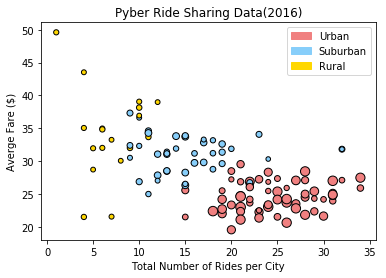

In [6]:
plt.show()

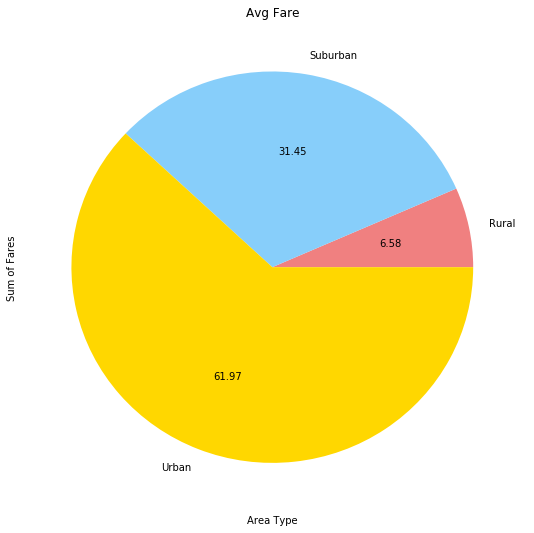

In [7]:
'''% of Total Fares by City Type'''
 # Create a group based on the values in the 'fare sum' column
fares_group = pyber_df.groupby('cat')

# Count how many times each maker appears in our group
sum_fare = fares_group['Fare Sum'].sum()
colors = ['lightcoral', 'lightskyblue', 'gold']

 # Create a bar chart based off of the group series from before
count_chart = sum_fare.plot(kind='pie', figsize=(9,9), colors=colors, autopct='%.2f')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Area Type")
count_chart.set_ylabel("Sum of Fares")
count_chart.set_title('Avg Fare')

plt.show()

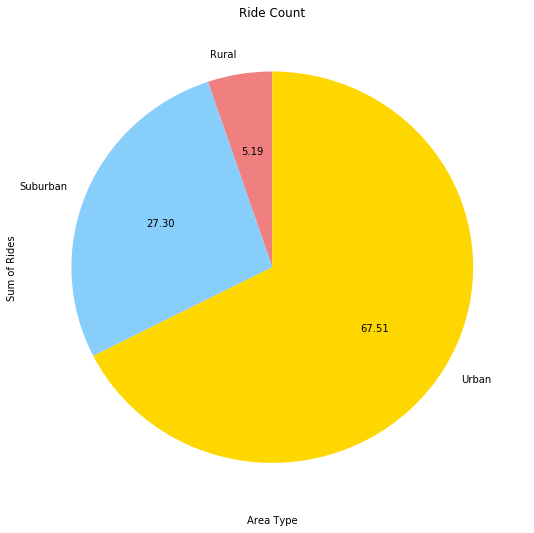

In [8]:
'''% of Total Rides by City Type'''
 # Create a group based on the values in the 'ride cnt' column
rides_group = pyber_df.groupby('cat')

# Count how many rides in each city
cnt_rides = fares_group['Ride Cnt'].sum()
colors = ['lightcoral', 'lightskyblue', 'gold']

 # Create a bar chart based off of the group series from before
count_chart = cnt_rides.plot(kind='pie', figsize=(9,9), colors=colors, autopct='%.2f',startangle=90)
sum

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Area Type")
count_chart.set_ylabel("Sum of Rides")
count_chart.set_title('Ride Count')

plt.show()

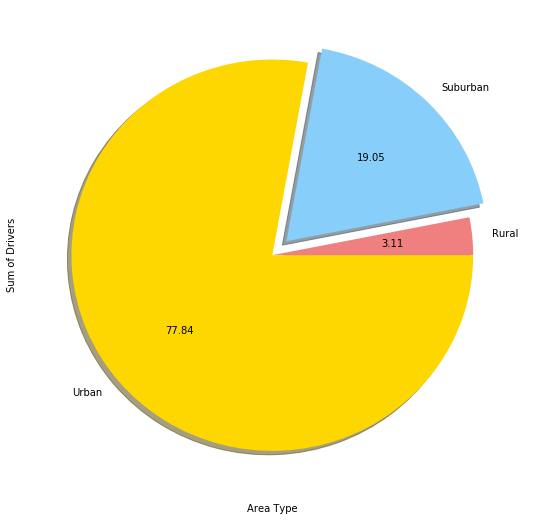

In [9]:
'''% of Total drivers by City Type'''
 # Create a group based on the values in the 'maker' column
drivers_group = pyber_df.groupby('cat')

# Count how many times each maker appears in our group
cnt_drivers = drivers_group['Driver Cnt'].sum()
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0,0.1,0)

 # Create a bar chart based off of the group series from before
count_chart = cnt_drivers.plot(kind='pie', figsize=(9,9), colors=colors, autopct='%.2f', shadow=True,explode=explode)
sum

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Area Type")
count_chart.set_ylabel("Sum of Drivers")
count_chart.set_title('')

plt.show()